# House Prices Competition

Link: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from scipy.stats import boxcox, yeojohnson
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, LinearSVR, NuSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from tqdm.auto import tqdm

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## EDA

In [156]:
pd.read_csv('home-data/sample_submission.csv').head(3)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570


In [157]:
df_train = pd.read_csv('home-data/train.csv')
df_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [158]:
df_test = pd.read_csv('home-data/test.csv')
df_test.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [159]:
def get_summary_df(df):
    return pd.concat([pd.DataFrame({
        'Column': df.columns,
        'Data_Type': df.dtypes,
        'Non_Null_Count': df.count(),
        'Null_Count': df.isnull().sum(),
        'Unique_Count': df.nunique()
    }).set_index('Column'), df.describe().T], axis=1)

In [160]:
df_train_summary = get_summary_df(df_train)
df_train_summary

,Data_Type,Non_Null_Count,Null_Count,Unique_Count,count,mean,std,min,25%,50%,75%,max
Id,int64,1460,0,1460,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,int64,1460,0,15,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
MSZoning,object,1460,0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,float64,1201,259,110,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,int64,1460,0,1073,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
Street,object,1460,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,object,91,1369,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,object,1460,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,object,1460,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,object,1460,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
df_test_summary = get_summary_df(df_test)
df_test_summary

,Data_Type,Non_Null_Count,Null_Count,Unique_Count,count,mean,std,min,25%,50%,75%,max
Id,int64,1459,0,1459,1459.0,2190.000000,421.321334,1461.0,1825.50,2190.0,2554.50,2919.0
MSSubClass,int64,1459,0,16,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
MSZoning,object,1455,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,float64,1232,227,115,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,int64,1459,0,1106,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
Street,object,1459,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,object,107,1352,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,object,1459,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,object,1459,0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,object,1457,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
df_train_summary[(df_train_summary.Data_Type != 'object') & (df_train_summary.Null_Count > 0)]

,Data_Type,Non_Null_Count,Null_Count,Unique_Count,count,mean,std,min,25%,50%,75%,max
LotFrontage,float64,1201,259,110,1201.0,70.049958,24.284752,21.0,59.0,69.0,80.0,313.0
MasVnrArea,float64,1452,8,327,1452.0,103.685262,181.066207,0.0,0.0,0.0,166.0,1600.0
GarageYrBlt,float64,1379,81,97,1379.0,1978.506164,24.689725,1900.0,1961.0,1980.0,2002.0,2010.0


In [163]:
category_cols = df_train_summary[df_train_summary.Data_Type == 'object'].index.to_list()

nullable_category_cols = list(set(
    df_train_summary[
        (df_train_summary.Data_Type == 'object') & (df_train_summary.Null_Count > 0)
    ].index.to_list() + 
    df_test_summary[
        (df_test_summary.Data_Type == 'object') & (df_test_summary.Null_Count > 0)
    ].index.to_list()
))
print('nullable_category_cols', len(nullable_category_cols))

nullable_category_cols 23


In [164]:
vf_train = df_train.copy()
vf_test = df_test.copy()

for col in nullable_category_cols:
    vf_train[col] = vf_train[col].fillna('MISSING')
    vf_test[col] = vf_test[col].fillna('MISSING')

quant_cols_replacements = {
    'LotFrontage': (df_train['LotFrontage'] / df_train['LotArea']).median(),
    'MasVnrArea': 0,
    'BsmtFinSF1': 0,
    'BsmtFinSF2': 0,
    'BsmtUnfSF': 0,
    'TotalBsmtSF': 0,
    'BsmtFullBath': 0,
    'BsmtHalfBath': 0,
    'GarageCars': 0,
    'GarageArea': 0,
    'GarageYrBlt': 0, # Better way to handle?
}
for col, na_val in quant_cols_replacements.items():
    vf_train[col] = vf_train[col].fillna(na_val)
    vf_test[col] = vf_test[col].fillna(na_val)

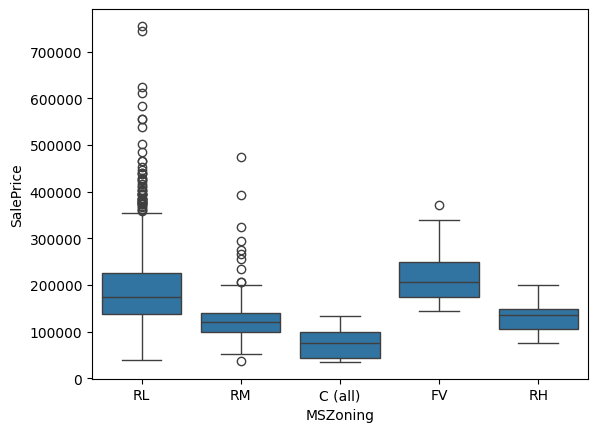

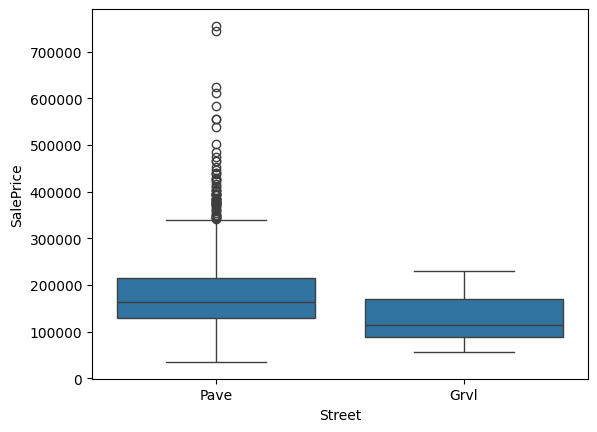

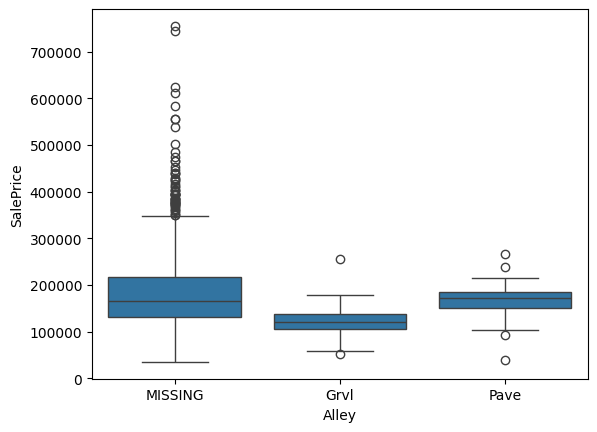

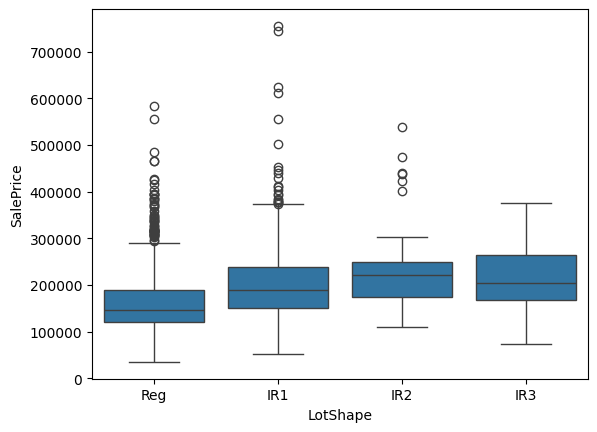

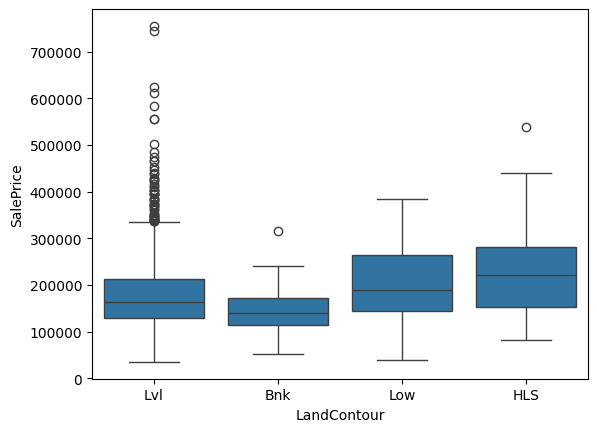

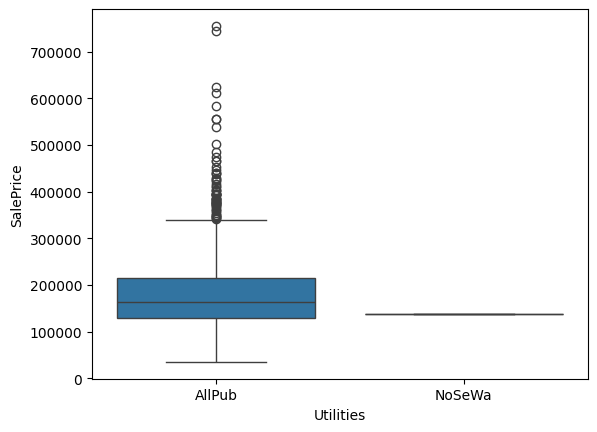

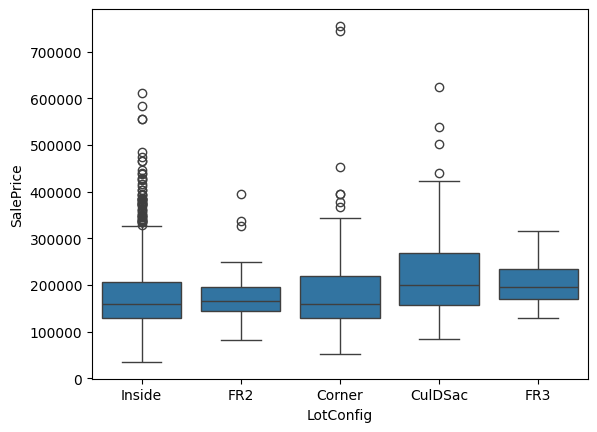

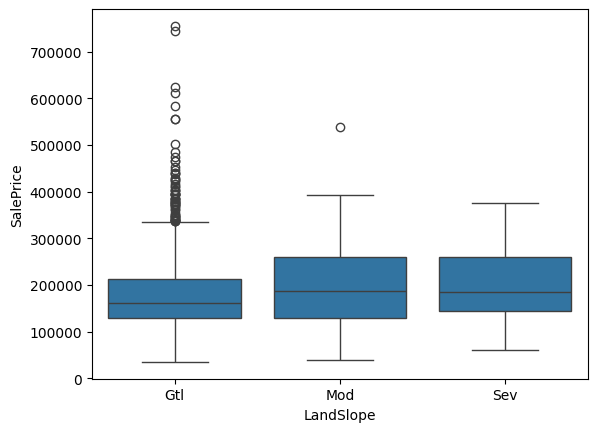

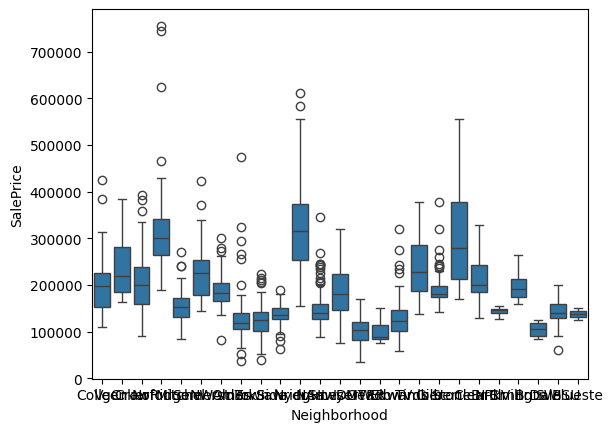

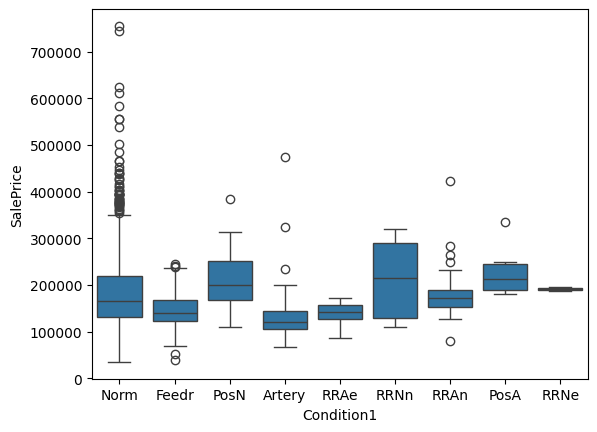

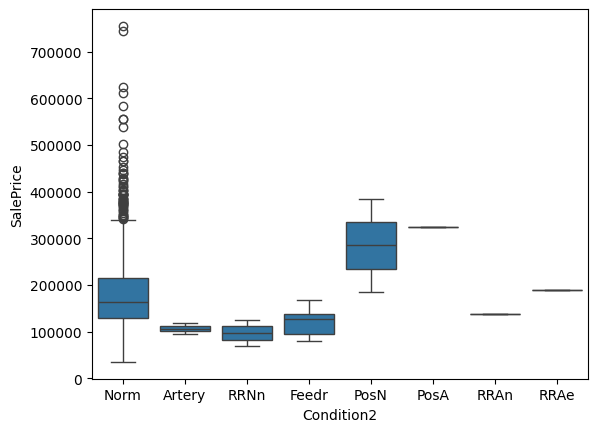

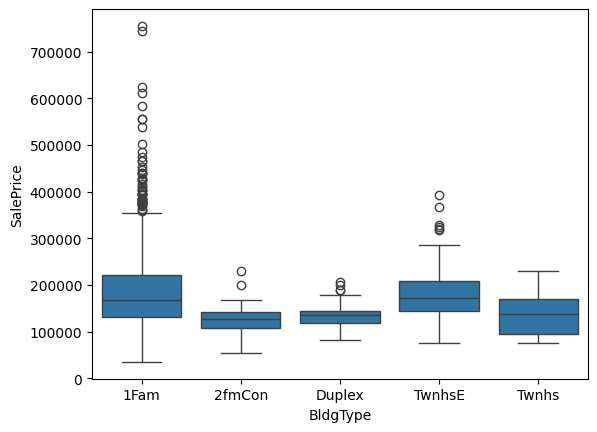

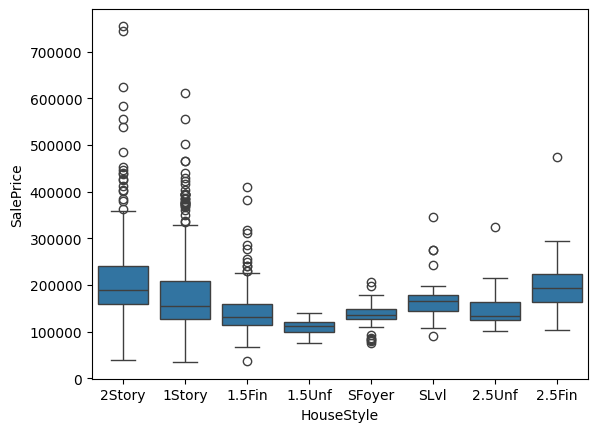

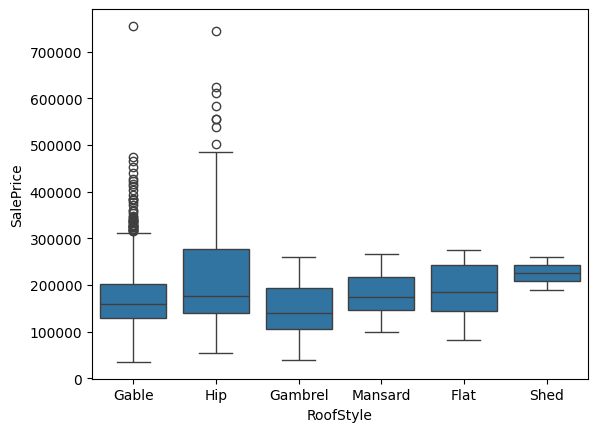

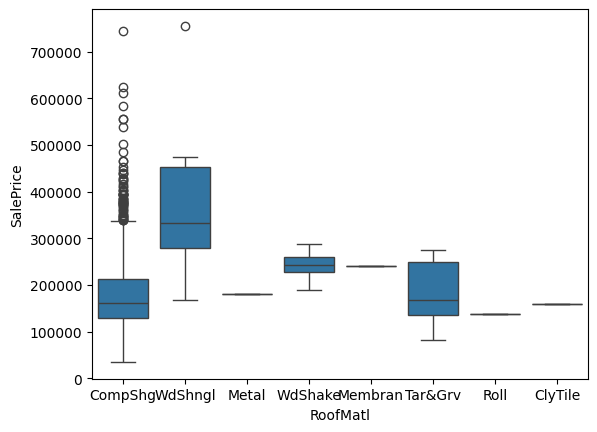

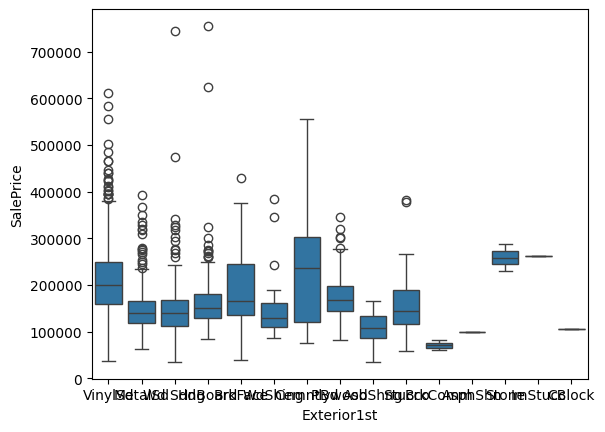

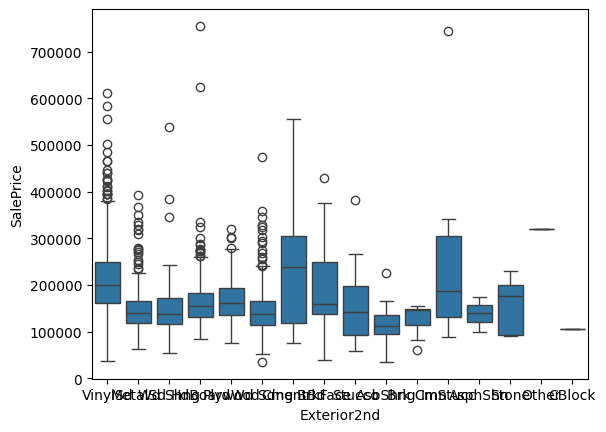

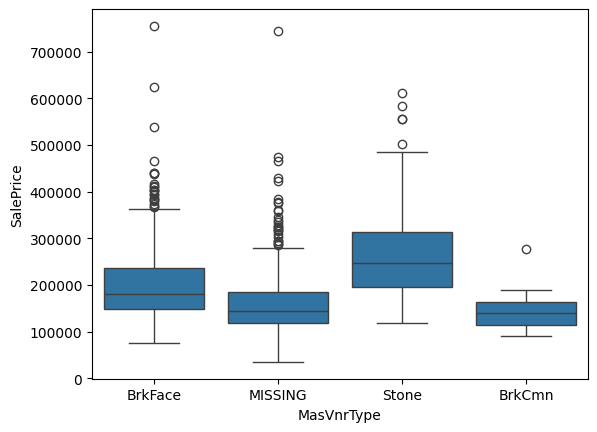

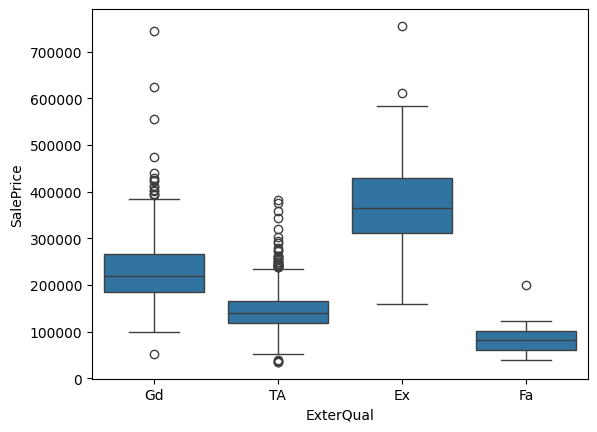

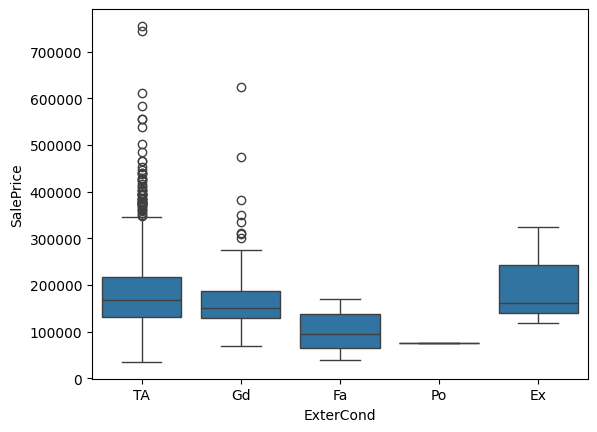

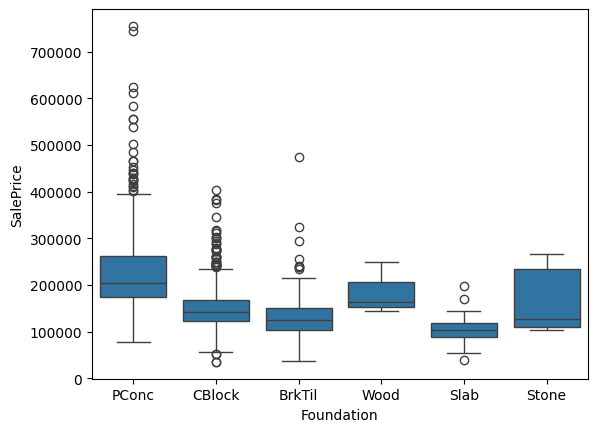

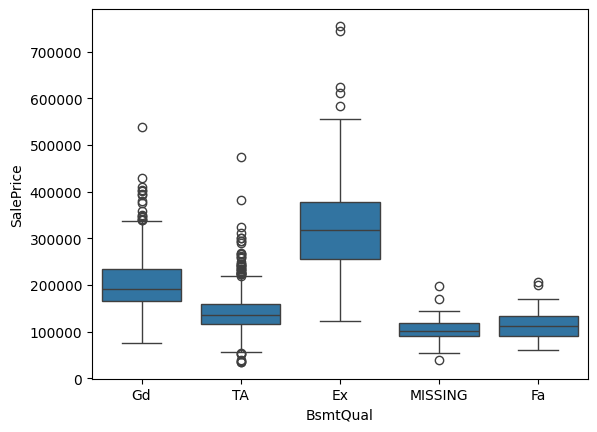

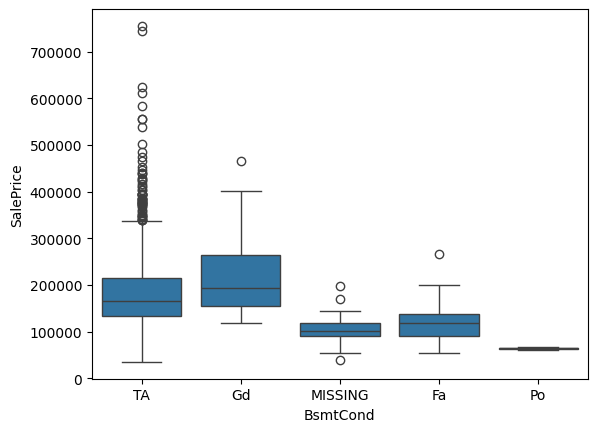

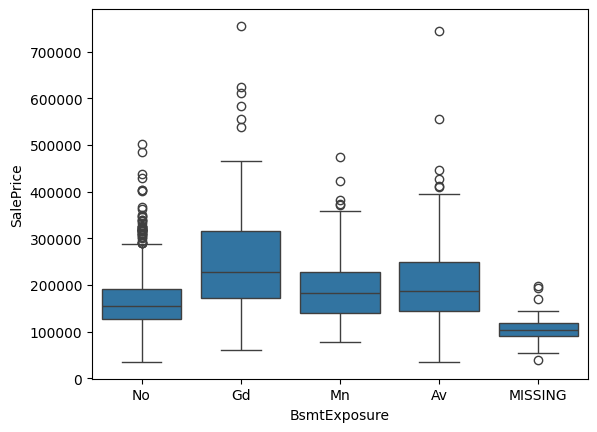

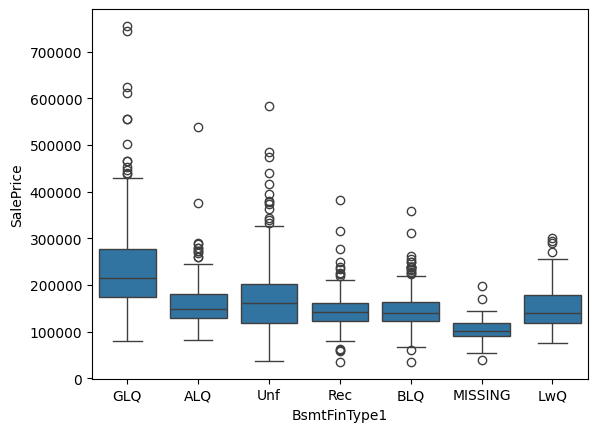

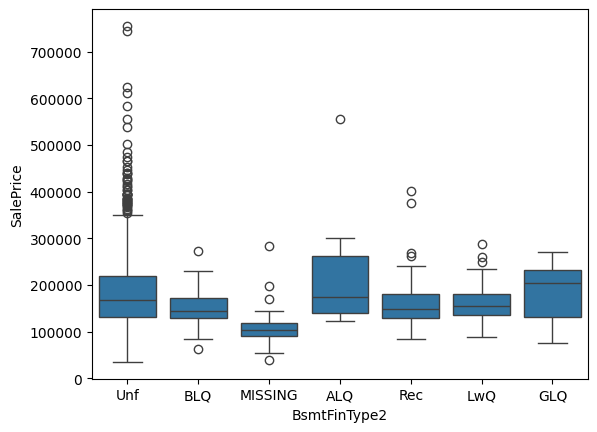

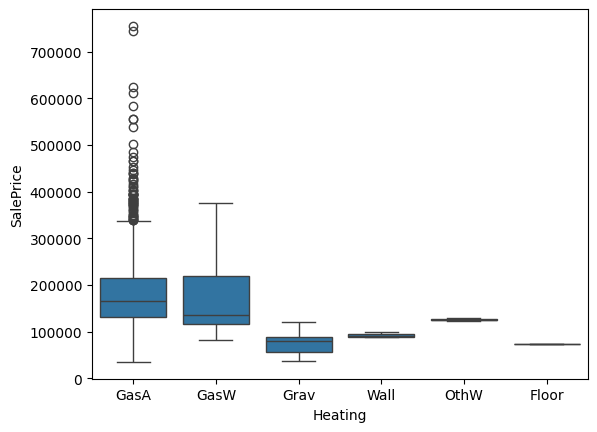

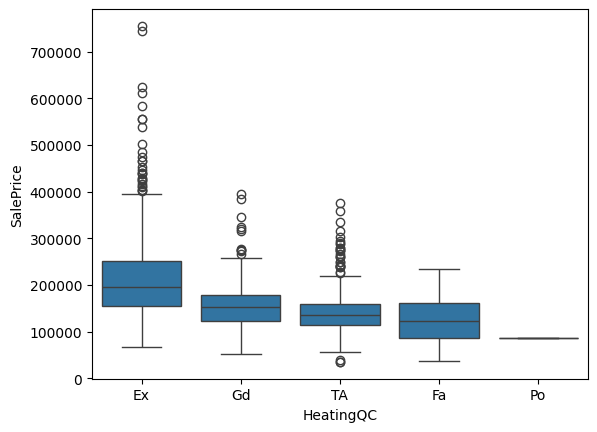

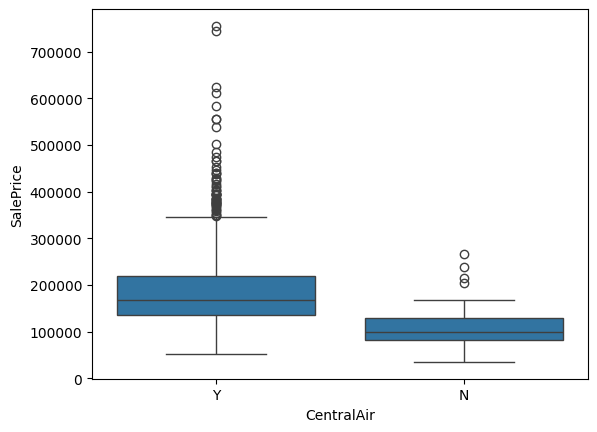

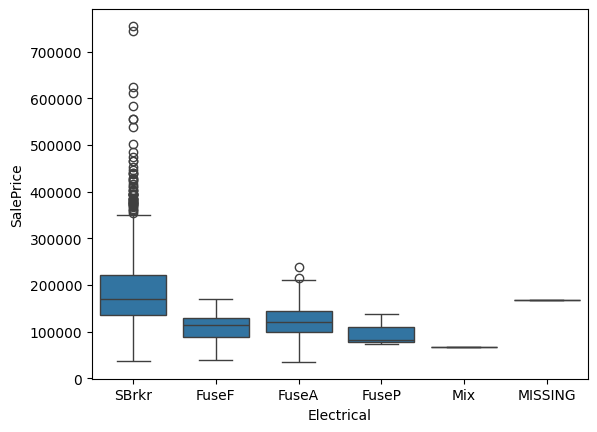

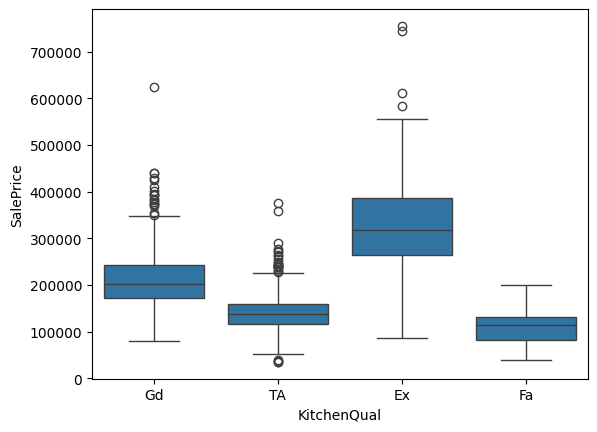

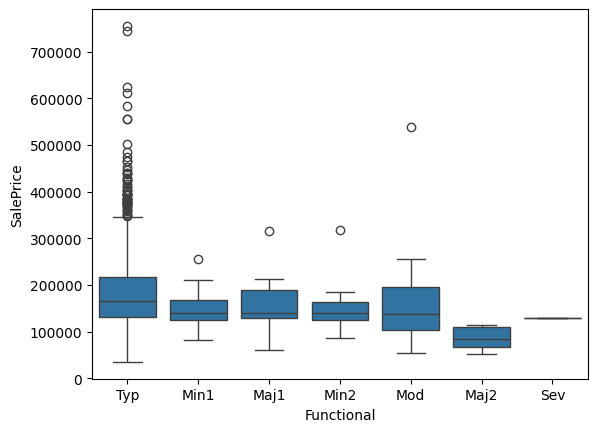

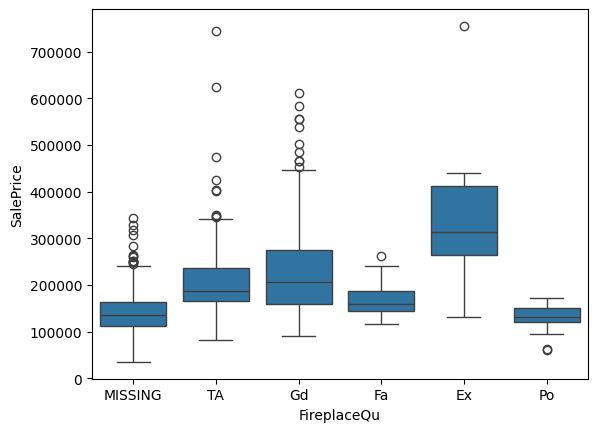

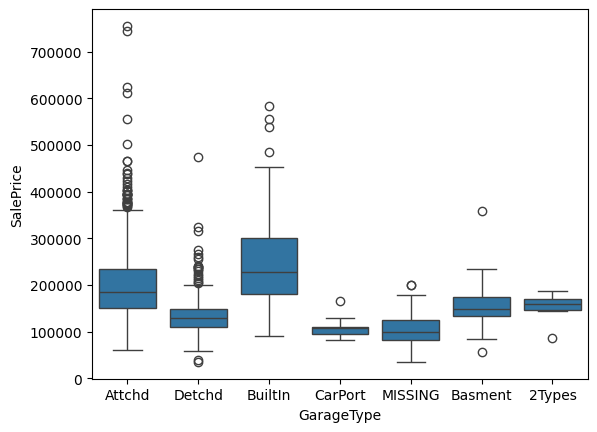

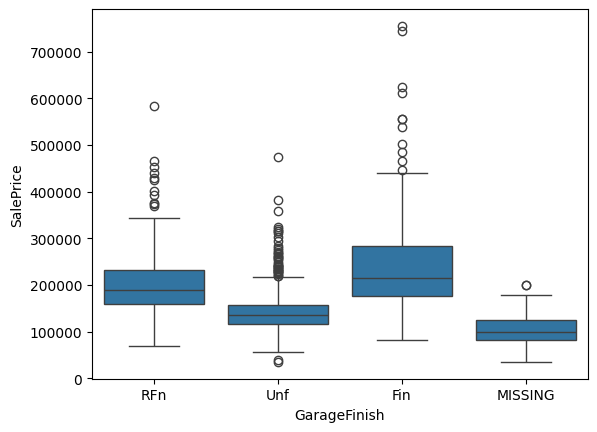

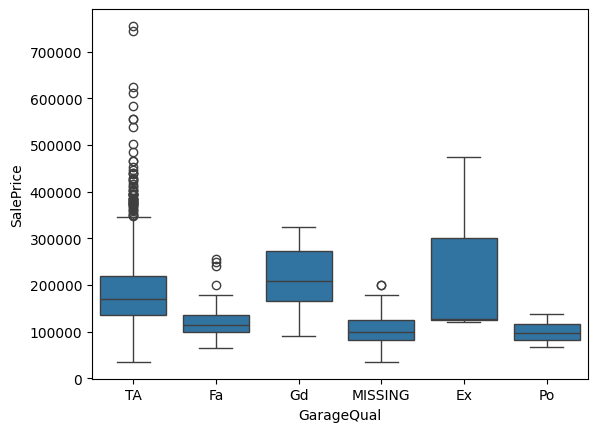

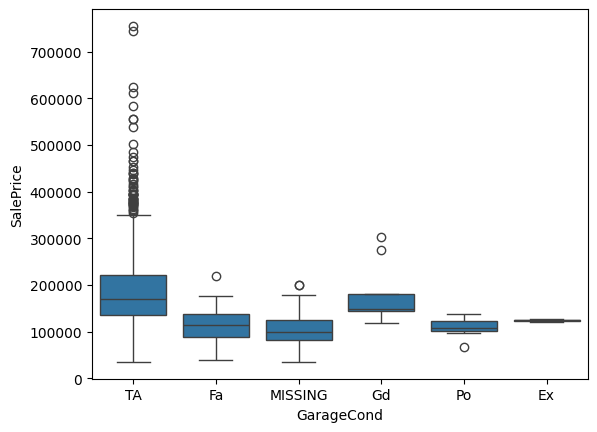

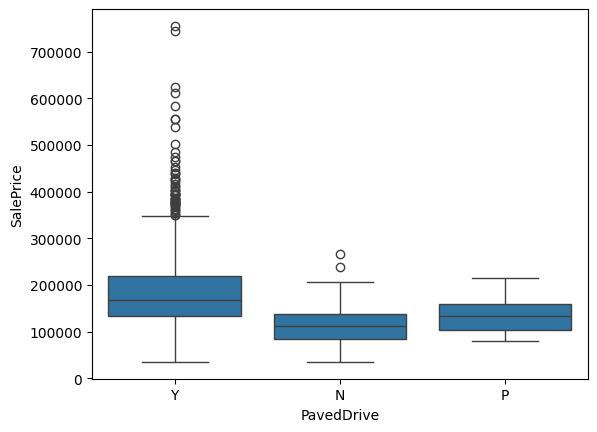

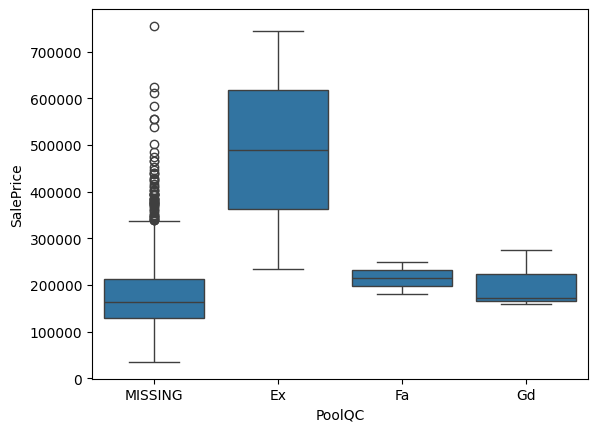

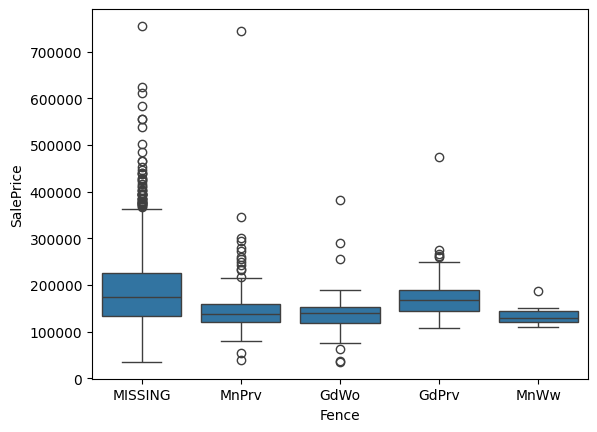

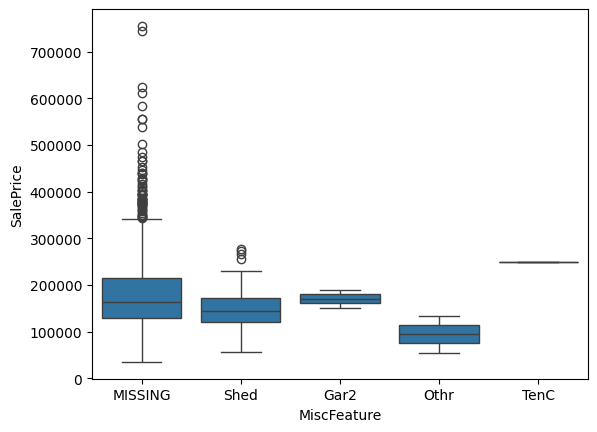

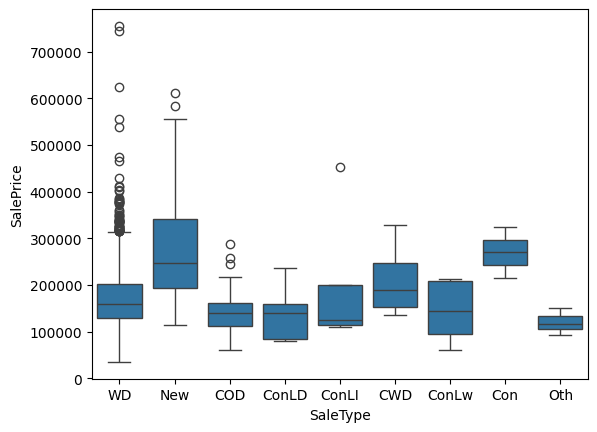

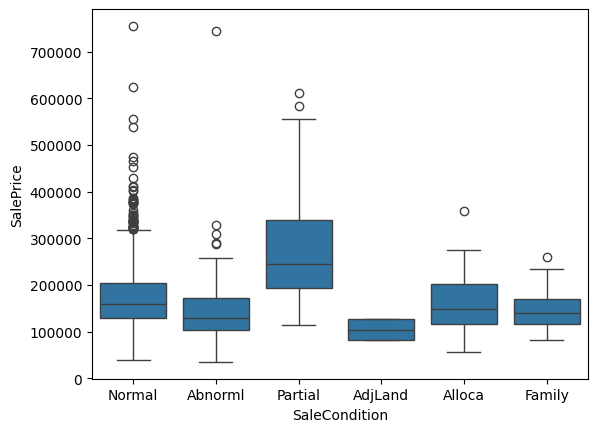

In [166]:
for col in category_cols:
    sns.boxplot(data=vf_train, x=col, y='SalePrice')
    plt.show()

In [167]:
label_encoders = {}

for col in category_cols:
    df_col = pd.concat([vf_train[col], vf_test[col]], ignore_index=True)
    le = LabelEncoder()
    le.fit(df_col)
    label_encoders[col] = le
    vf_train[col] = le.transform(vf_train[col])
    vf_test[col] = le.transform(vf_test[col])
    
vf_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,4,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,13,14,1,196.0,2,4,2,2,4,4,2,706,6,0,150,856,1,0,1,5,856,854,0,1710,1,0,2,1,3,1,2,8,7,0,3,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,3,2,1,0,2,2008,9,4,208500
1,2,20,4,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,9,9,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,0,1,5,1262,0,0,1262,0,1,2,0,3,1,4,6,7,1,5,1,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,3,2,1,0,5,2007,9,4,181500
2,3,60,4,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,13,14,1,162.0,2,4,2,2,4,3,2,486,6,0,434,920,1,0,1,5,920,866,0,1786,1,0,2,1,3,1,2,6,7,1,5,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,3,2,1,0,9,2008,9,4,223500


In [168]:
a = get_summary_df(vf_train)
print(a[a.Null_Count > 0])

print('='*80)

a = get_summary_df(vf_test)
print(a[a.Null_Count > 0])

Empty DataFrame
Columns: [Data_Type, Non_Null_Count, Null_Count, Unique_Count, count, mean, std, min, 25%, 50%, 75%, max]
Index: []
Empty DataFrame
Columns: [Data_Type, Non_Null_Count, Null_Count, Unique_Count, count, mean, std, min, 25%, 50%, 75%, max]
Index: []


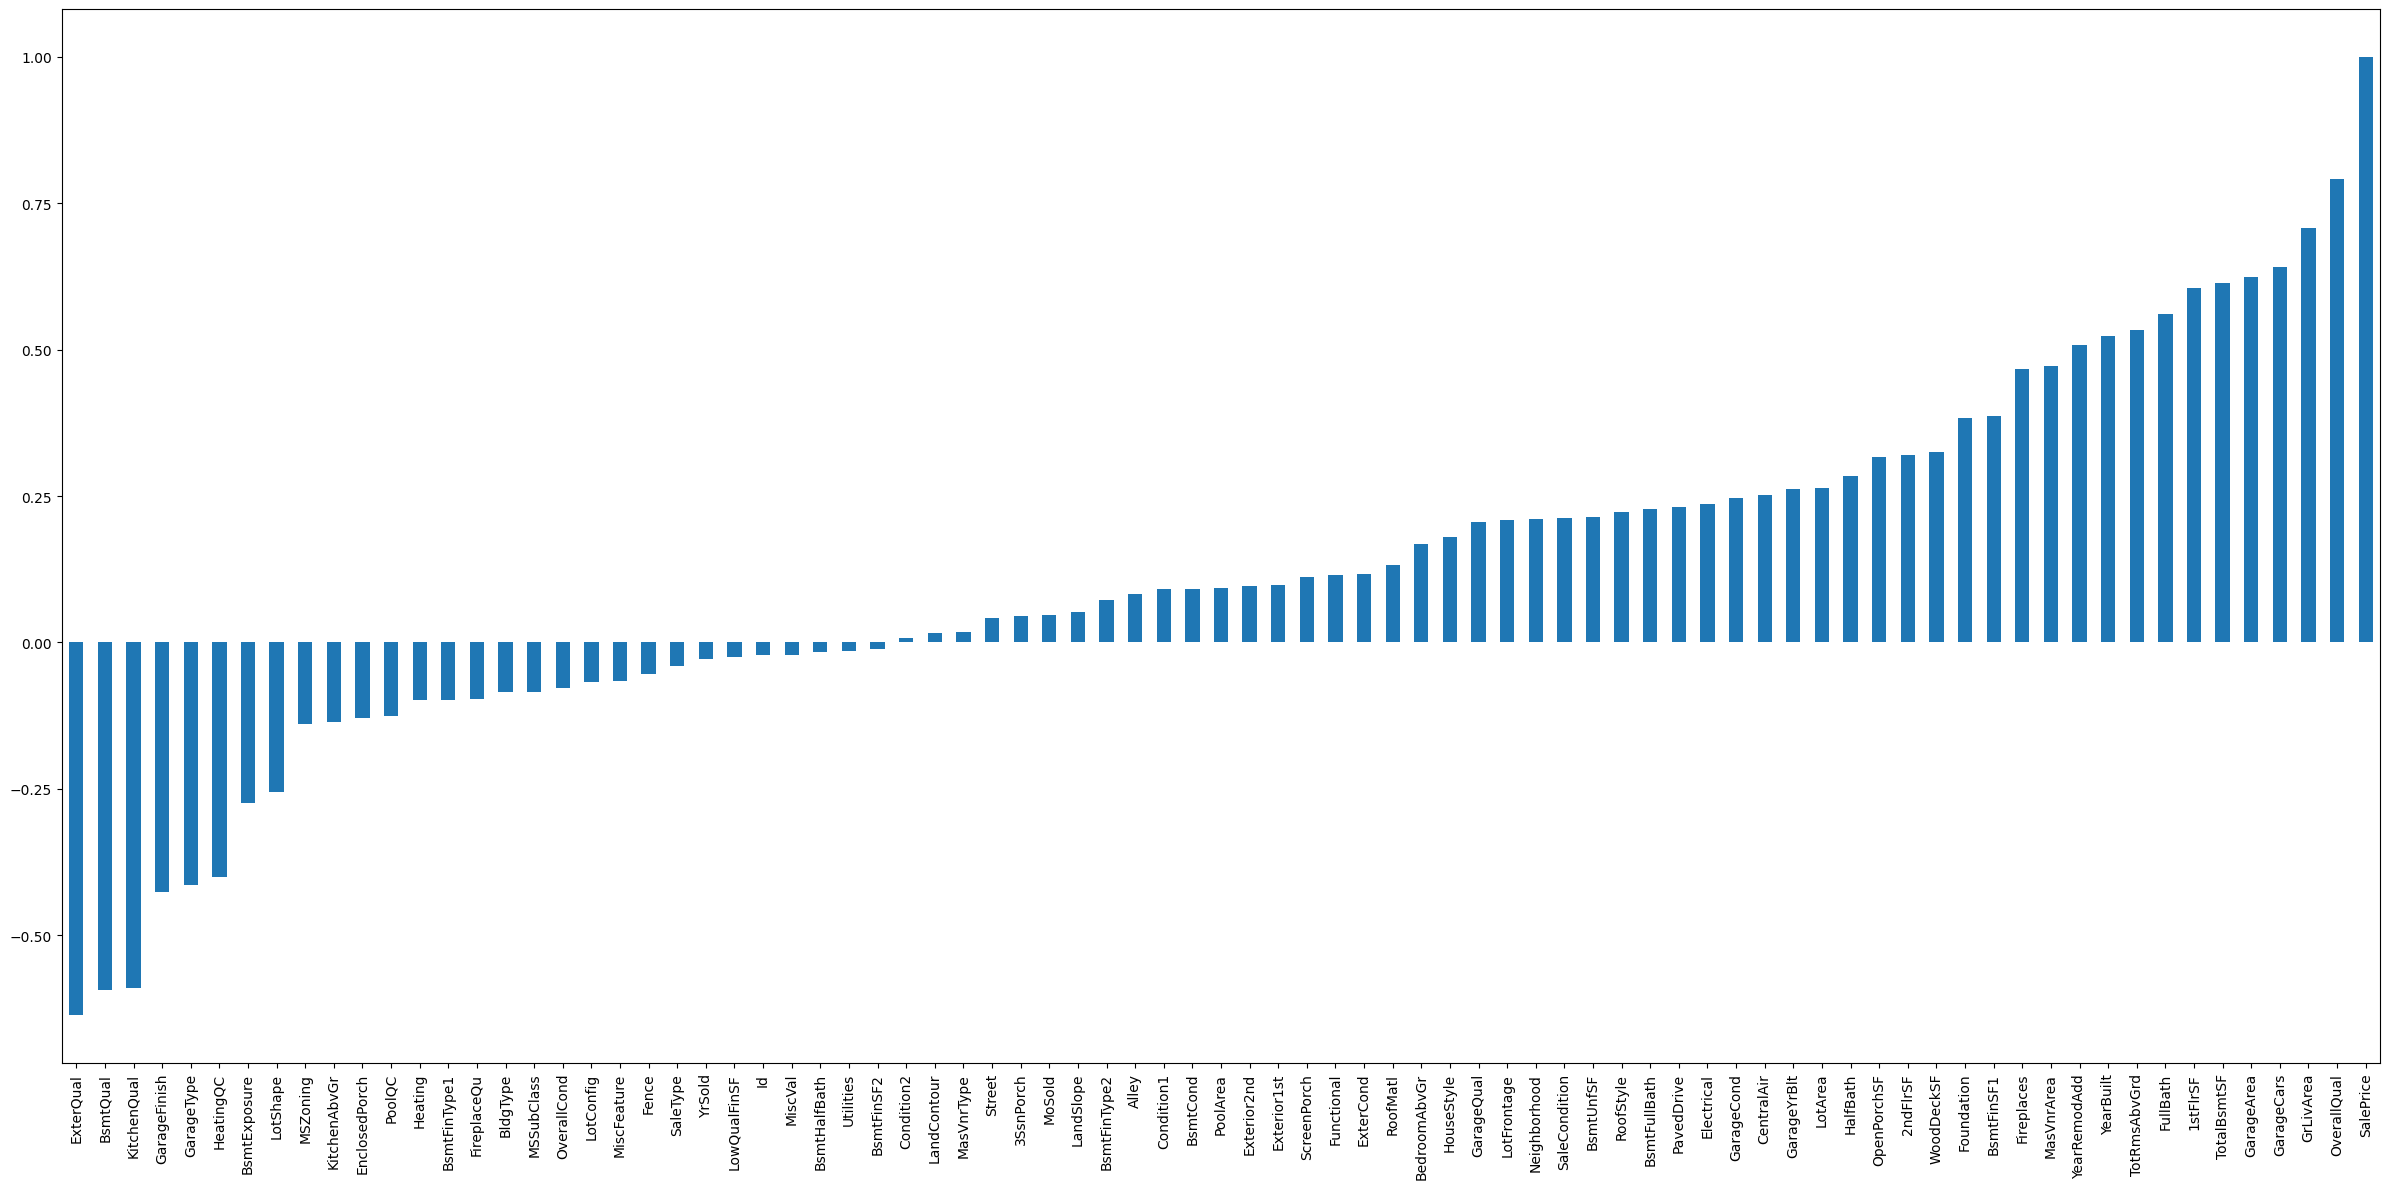

In [169]:
vf_train_corr = vf_train.corr()
plt.figure(figsize=(24, 12))
vf_train_corr['SalePrice'].sort_values().plot(kind='bar')
plt.tight_layout()
plt.show()

<Axes: >

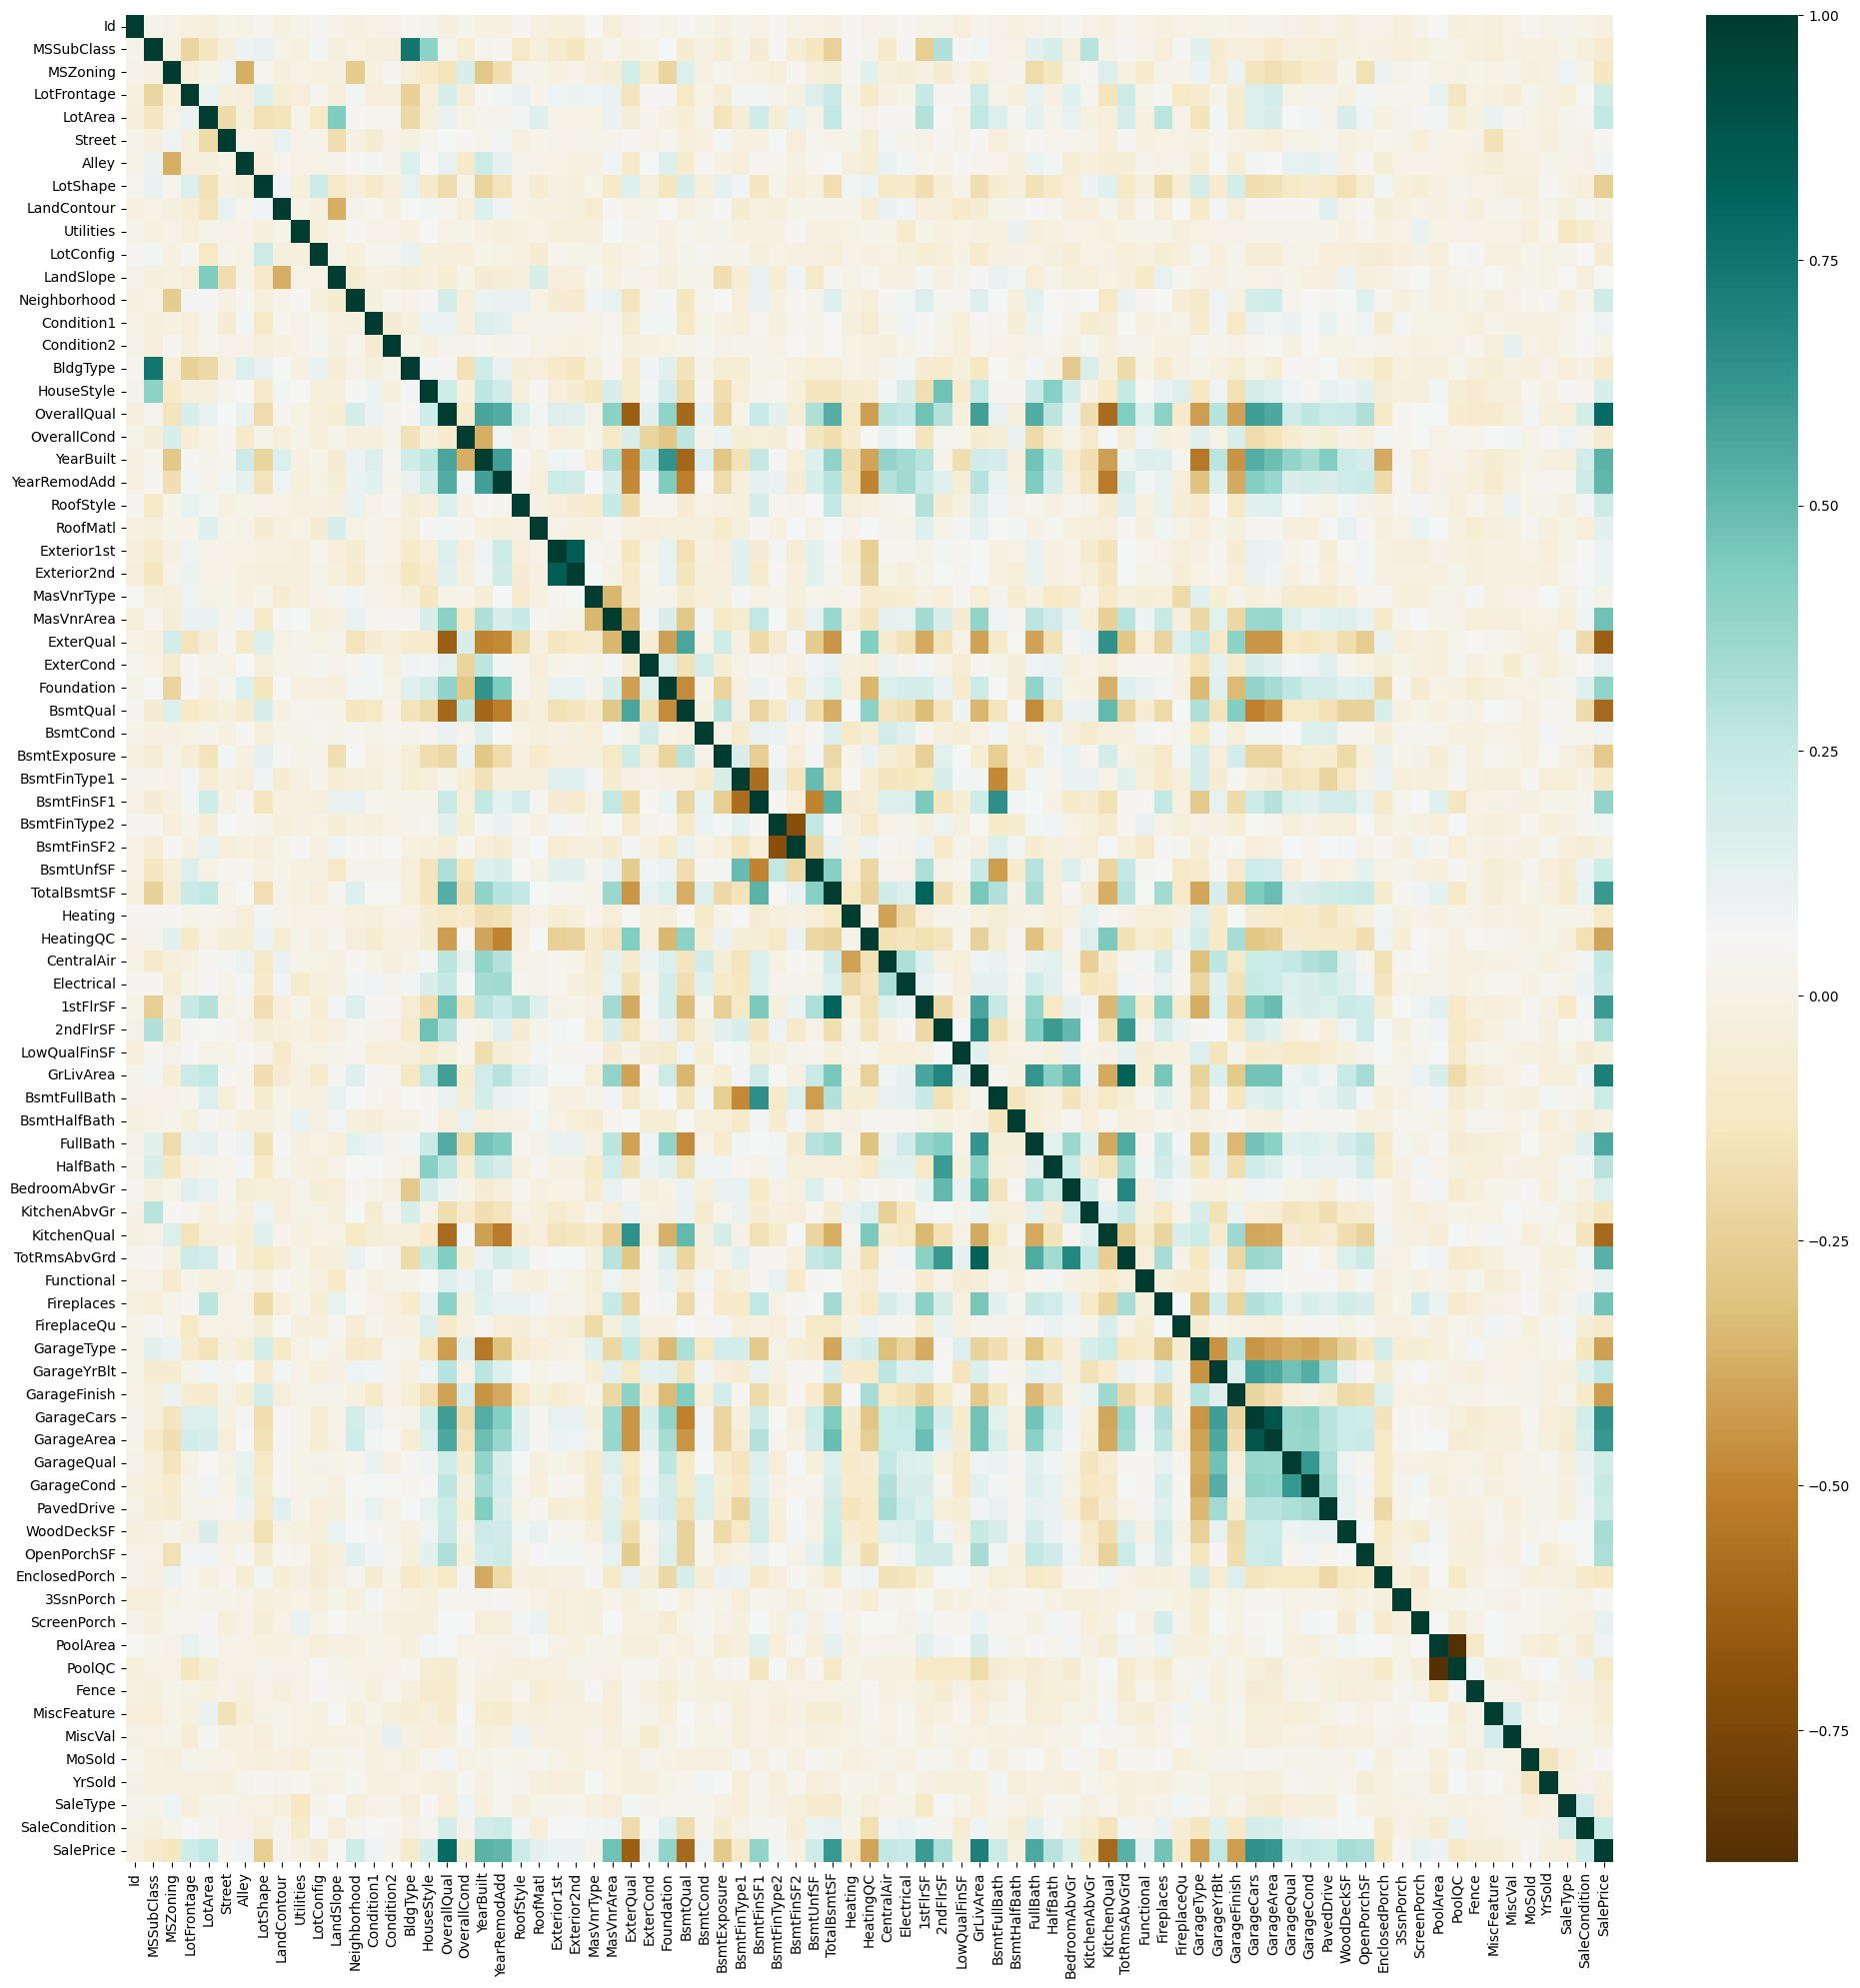

In [170]:
plt.figure(figsize=(24, 24))
sns.heatmap(vf_train.corr(), cmap='BrBG')

In [171]:
imp_cols = vf_train_corr['SalePrice'][vf_train_corr['SalePrice'].abs() > 0.2].drop('SalePrice').sort_values()
imp_cols

ExterQual       -0.636884
BsmtQual        -0.593734
KitchenQual     -0.591175
GarageFinish    -0.425684
GarageType      -0.415283
HeatingQC       -0.400178
BsmtExposure    -0.274589
LotShape        -0.255580
GarageQual       0.205963
LotFrontage      0.209638
Neighborhood     0.210851
SaleCondition    0.213092
BsmtUnfSF        0.214479
RoofStyle        0.222405
BsmtFullBath     0.227122
PavedDrive       0.231357
Electrical       0.236391
GarageCond       0.246705
CentralAir       0.251328
GarageYrBlt      0.261366
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
Foundation       0.382479
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.472614
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual 

## Feature Engineering

In [172]:
X_train_final = vf_train.drop('SalePrice', axis=1)
# X_train_final = vf_train[imp_cols.index.to_list()]
Y_train_final = vf_train['SalePrice']

X_test_final = vf_test
# X_test_final = vf_test[imp_cols.index.to_list()]

In [ ]:
encoded_columns = 

In [ ]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
pd.concat([vf_train[col], vf_test[col]], ignore_index=True)

## Model Evaluation

In [173]:
models = [
    LinearRegression(),
    Pipeline([
        ('scaler', StandardScaler()),
        ('logistic', LogisticRegression(max_iter=1000)),
    ]),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    # LinearSVR(),
    # NuSVR(),
    ExtraTreesRegressor(),
    GradientBoostingRegressor(),
    AdaBoostRegressor(DecisionTreeRegressor(), learning_rate=0.1),
    XGBRegressor(),
    LGBMRegressor(),
]

In [174]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_results = []
cv_names = []
cv_means = []
cv_std = []

for model in tqdm(models):
    cv_result = cross_val_score(model, X_train_final, y=Y_train_final, 
                                scoring='r2', cv=kfold, n_jobs=4)
    cv_results.append(cv_result)
    cv_names.append(model.__class__.__name__)
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({
    'CrossValMeans': cv_means,
    'CrossValErrors': cv_std,
    'Algorithm': cv_names
})

  0%|          | 0/10 [00:00<?, ?it/s]

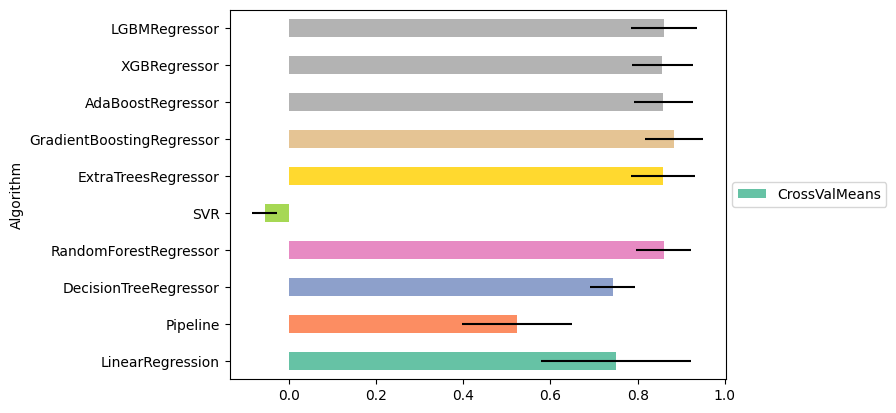

In [175]:
colors = cm.Set2(range(len(cv_res)))
cv_res.plot(kind='barh', y='CrossValMeans', x='Algorithm', xerr=cv_std, color=colors)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [176]:
cv_res['criterion'] = cv_res['CrossValMeans'] - (cv_res['CrossValErrors']/2)
cv_res.sort_values(by='criterion', ascending=False)

,CrossValMeans,CrossValErrors,Algorithm,criterion
6,0.883497,0.066304,GradientBoostingRegressor,0.850345
3,0.859938,0.063092,RandomForestRegressor,0.828392
7,0.859253,0.067019,AdaBoostRegressor,0.825743
9,0.860836,0.075546,LGBMRegressor,0.823063
8,0.856330,0.069544,XGBRegressor,0.821558
5,0.857815,0.073596,ExtraTreesRegressor,0.821018
2,0.742739,0.051684,DecisionTreeRegressor,0.716897
0,0.750607,0.171543,LinearRegression,0.664836
1,0.523580,0.127121,Pipeline,0.460019
4,-0.054846,0.028952,SVR,-0.069322


In [177]:
[(idx, cv_names[idx]) for idx in cv_res.query('criterion > 0.8').index]

[(3, 'RandomForestRegressor'),
 (5, 'ExtraTreesRegressor'),
 (6, 'GradientBoostingRegressor'),
 (7, 'AdaBoostRegressor'),
 (8, 'XGBRegressor'),
 (9, 'LGBMRegressor')]

In [ ]:
for model_idx in tqdm(cv_res.query('criterion > 0.8').index):
    algo = cv_names[model_idx]
    model = models[model_idx]
    print(f'predicting: {algo}')
    model.fit(X_train_final, Y_train_final)
    y_pred = model.predict(X_test_final)
    
    y_test = pd.concat([vf_test[['Id']], pd.DataFrame(y_pred, columns=['SalePrice'])], axis=1)
    print(y_test.head(2))
    
    output_file = f'home-data_output/Raw_{algo}.csv'
    y_test.to_csv(output_file, index=False)

In [180]:
def create_grid_searches(models_config, X_train, y_train, cv=kfold, n_jobs=4, verbose=1):
    results = {}
    
    for model_name, (model, param_grid) in pqdm(models_config.items()):
        print("\n" + "="*50)
        print(f"{model_name} Grid Search")
        print("="*50)
        
        gs = GridSearchCV(model, param_grid=param_grid, cv=cv, scoring='r2', n_jobs=n_jobs, verbose=verbose)
        gs.fit(X_train, y_train)
        
        results[model_name] = {
            'best_model': gs.best_estimator_,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_,
            'gs_object': gs
        }
        
        print(f"Best Score: {gs.best_score_:.4f}")
        print(f"Best Params: {gs.best_params_}")
    
    return results

In [185]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
rf_param_grid = {
    "max_depth": [int(x) for x in np.linspace(1, 20, num = 5)] + [None],
    "max_features": ['log2', 'sqrt', None],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [2, 4],
    "bootstrap": [True, False],
    "n_estimators": [int(x) for x in np.linspace(start = 200, stop = 1400, num = 4)],
}

et_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

gb_param_grid = {
    'loss' : ['squared_error'],
    'n_estimators' : [1, 2, 4, 32, 100, 150, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'max_depth': [1, 2, 4, 8, 16, 32],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', 0.5]
}

ada_param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

xgb_param_grid = {
    'n_estimators' : [1, 2, 4, 32, 100, 150, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01, 0.005],
    'min_child_weight': np.linspace(1, 10, 5, endpoint=True),
    'gamma': np.linspace(0.5, 5, 5, endpoint=True),
    'subsample': np.linspace(0.5, 1, 5, endpoint=True),
    'colsample_bytree': np.linspace(0.5, 1, 5, endpoint=True),
    'max_depth': [1, 2, 4, 8, 10],
}

lgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9],
    'num_leaves': [20, 31, 50],
    'min_child_samples': [10, 20, 30]
}

best_models_config = {
    'RandomForestRegressor': (RandomForestRegressor(random_state=42), rf_param_grid),
    'ExtraTreesRegressor': (ExtraTreesRegressor(random_state=42), et_param_grid),
    'GradientBoostingRegressor': (GradientBoostingRegressor(random_state=42), gb_param_grid),
    'AdaBoostRegressor': (AdaBoostRegressor(random_state=42), ada_param_grid),
    'XGBRegressor': (XGBRegressor(random_state=42, verbosity=0), xgb_param_grid),
    'LGBMRegressor': (LGBMRegressor(random_state=42, verbosity=-1), lgb_param_grid),
}

In [ ]:
grid_results = create_grid_searches(best_models_config, X_train_final, Y_train_final, cv=kfold)


RandomForestRegressor Grid Search
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


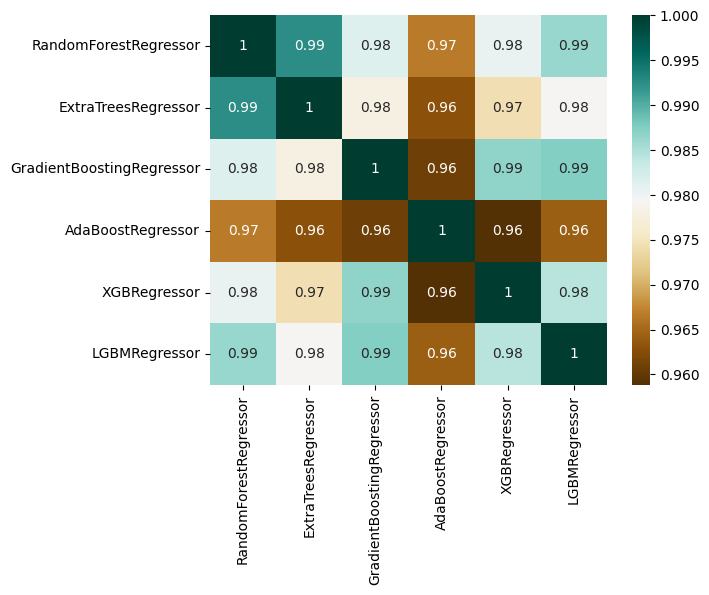

In [188]:
test_results = [
    pd.Series(model_results['best_model'].predict(X_test_final), name=model_name)
    for model_name, model_results in grid_results.items()
]

ensemble_results = pd.concat(test_results, axis=1)
g = sns.heatmap(ensemble_results.corr(), annot=True, cmap='BrBG')

In [209]:
ensemble_results.head(3)

,RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor,AdaBoostRegressor,XGBRegressor,LGBMRegressor
0,127632.500000,126642.370000,122286.014294,119179.454259,128060.984375,125576.574587
1,154808.305556,153910.063333,163053.393427,144969.903226,171282.359375,153388.516952
2,181689.840000,179733.783333,182326.570638,178090.881481,179789.140625,178748.384286


In [201]:
for algo in tqdm(ensemble_results.columns):
    print(f'processing {algo}')
    y_test = pd.concat([vf_test[['Id']], pd.DataFrame(ensemble_results[algo].to_numpy(), columns=['SalePrice'])], axis=1)
    print(y_test.head(2))
    
    output_file = f'home-data_output/GridSearch_{algo}.csv'
    y_test.to_csv(output_file, index=False)

  0%|          | 0/6 [00:00<?, ?it/s]

processing RandomForestRegressor
     Id      SalePrice
0  1461  127632.500000
1  1462  154808.305556
processing ExtraTreesRegressor
     Id      SalePrice
0  1461  126642.370000
1  1462  153910.063333
processing GradientBoostingRegressor
     Id      SalePrice
0  1461  122286.014294
1  1462  163053.393427
processing AdaBoostRegressor
     Id      SalePrice
0  1461  119179.454259
1  1462  144969.903226
processing XGBRegressor
     Id      SalePrice
0  1461  128060.984375
1  1462  171282.359375
processing LGBMRegressor
     Id      SalePrice
0  1461  125576.574587
1  1462  153388.516952


In [202]:
pd.read_csv('home-data_output/GridSearch_GradientBoostingRegressor.csv')

,Id,SalePrice
0,1461,122286.014294
1,1462,163053.393427
2,1463,182326.570638
3,1464,186333.986503
4,1465,180601.630026
...,...,...
1454,2915,63251.528085
1455,2916,77962.670684
1456,2917,163847.901089
1457,2918,106160.983176
